In [1]:
# download argp

# need to do a disk integration since there isn't a single path that light takes
#    - need to account for angles spanning the visible portion of the illuminated hemisphere

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import EPPE_Simulator as eppe
import astropy.constants as const
from matplotlib.ticker import MaxNLocator

In [3]:
systems = eppe.Systems(load=True)
mission = eppe.EPPE()
fp, fstar, noise = mission.expose_photometric(systems, expTime=1)

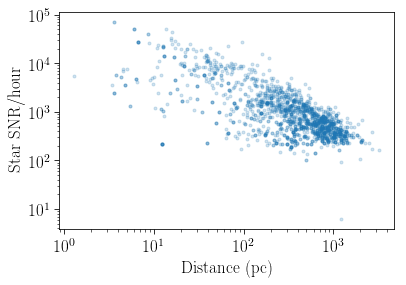

In [4]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fstar/noise, '.', alpha=0.2)
plt.ylabel(r'$\rm Star~SNR/hour$')
plt.xlabel(r'$\rm Distance~(pc)$')
plt.show()

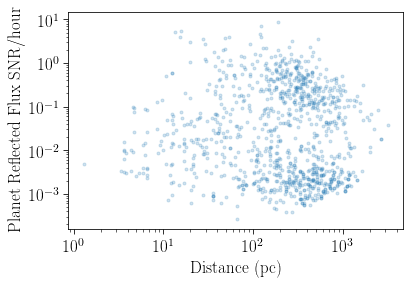

In [5]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fp/noise, '.', alpha=0.2)
plt.ylabel(r'$\rm Planet~Reflected~Flux~SNR/hour$')
plt.xlabel(r'$\rm Distance~(pc)$')
plt.show()

In [6]:
expTime = 2
intTime = 10*3*24.
# mission = eppe.EPPE(rad=0.8) # POMM
mission = eppe.EPPE() # EPPE
stokesCurves = mission.observe_polarization(systems, expTime, intTime, photonNoise=True)
stokesCurves_ideal = mission.observe_polarization(systems, expTime, intTime, photonNoise=False)
fps, fstars, times, phases = mission.observe_photometric(systems, expTime, intTime, photonNoise=True)

In [7]:
# i = 1
i = np.where(systems.catalogue['name']=='WASP-12 b')[0][0]
# i = np.where(systems.catalogue['name']=='HD 189733 b')[0][0]
# i = np.where(systems.catalogue['name']=='HD 209458 b')[0][0]
# i = np.where(systems.catalogue['name']=='KELT-7 b')[0][0]
# i = np.where(systems.catalogue['name']=='KELT-9 b')[0][0]

In [8]:
print('Name:', systems.catalogue['name'][i])
print('Period:', np.round(systems.catalogue['per'][i], 2), 'days')
print('Transit Depth: '+str(np.round((systems.catalogue['rp'][i]/systems.catalogue['rstar'][i])**2*100, 3))+'%')
print('Equilibrium Temperature: '+str(int(np.rint((systems.catalogue['teff'][i]*np.sqrt(systems.catalogue['rstar'][i]/systems.catalogue['a'][i])))))+' K')
print('Distance: '+str(int(np.rint(systems.catalogue['dist'][i]/const.pc.value)))+' pc')
print('Radius: '+str(np.round(systems.catalogue['rp'][i]/const.R_jup.value, 2))+' Rjup')

Name: WASP-12 b
Period: 1.09 days
Transit Depth: 1.384%
Equilibrium Temperature: 3541 K
Distance: 432 pc
Radius: 1.82 Rjup


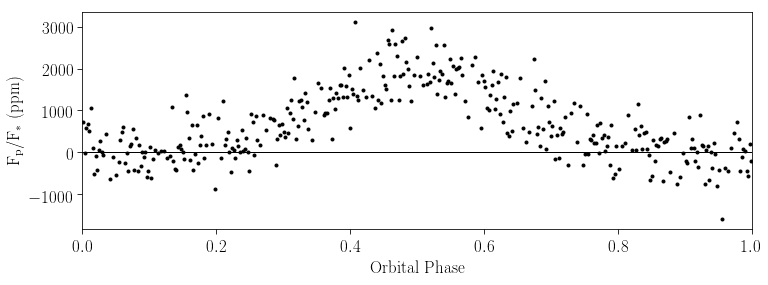

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(stokesCurves[i][-1], (stokesCurves[i][0]/np.median(fstars[i])-1)*1e6, '.', c='k')
ax.plot([0,1], [0,0], lw=1, c='k')
ax.set_ylabel(r'$\rm F_p/F_*~({\rm ppm})$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
plt.show()
plt.close(fig)

In [11]:
curve = stokesCurves[i][0]
std = np.sqrt(np.median(fstars[i]))
print('Amp/Noise =', (np.max(curve)-np.min(curve))/std)

Amp/Noise = 11.202163219285573


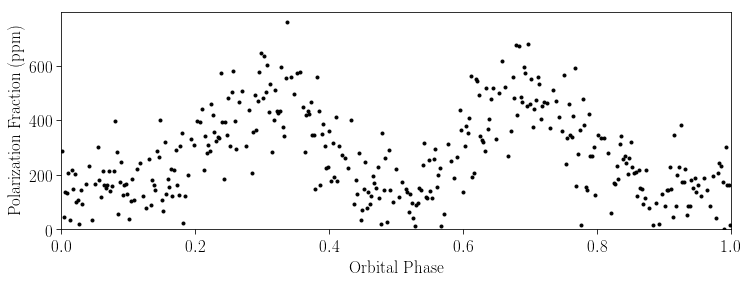

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(stokesCurves[i][-1], np.sqrt(stokesCurves[i][1]**2+stokesCurves[i][2]**2)/stokesCurves[i][0]*1e6,
        '.', c='k')
ax.set_ylabel(r'$\rm Polarization~Fraction~(ppm)$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
ax.set_ylim(0)
plt.show()
plt.close(fig)

In [20]:
curve = np.sqrt(stokesCurves[i][1]**2+stokesCurves[i][2]**2)/stokesCurves[i][0]*1e6
# curve = curve[np.argsort(stokesCurves[i][-1])]
# curve_ideal = np.sqrt(stokesCurves_ideal[i][1]**2+stokesCurves_ideal[i][2]**2)/stokesCurves_ideal[i][0]*1e6
# curve_ideal = curve_ideal[np.argsort(stokesCurves_ideal[i][-1])]
std = np.std(curve[np.logical_or(stokesCurves[i][-1]<0.1, stokesCurves[i][-1]>0.9)])
# std = np.std(curve-curve_ideal)
print('Amp/Noise =', (np.max(curve)-np.min(curve))/std)

Amp/Noise = 9.430363801114451


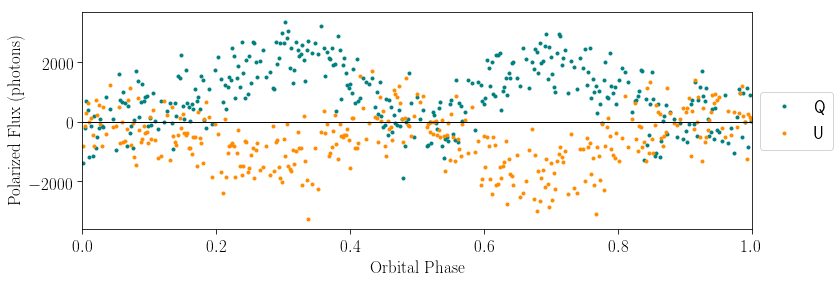

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(stokesCurves[i][-1], stokesCurves[i][1], '.', c='teal', label='Q')
ax.plot(stokesCurves[i][-1], stokesCurves[i][2], '.', c='darkorange', label='U')
# ax.plot(stokesCurves[i][-1], stokesCurves[i][3], '.', c='green', label='V')
ax.plot([0,1], [0,0], lw=1, c='k')
ax.set_ylabel(r'$\rm Polarized~Flux~(photons)$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
ax.legend(loc=6, bbox_to_anchor=(1,0.5))
plt.show()
plt.close(fig)

In [ ]:
# noise sources: flux variations, orientiation angle noise, 

In [15]:
# fitting params: (albedo*polarization fraction), {Omega, inclination} or {apparent inc, orbAxisAng angle}
# additional real params: Q+U+V offsets